In [1]:
#Understanding what impact the production of a movie (Finding correlations)
#import packages 


import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv(r'C:\Users\Khadijat\Documents\DataAnalytics2024\Untitled Folder\movies.csv') 

In [3]:
df #View the dataset
df.head() #View top 5 rows

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

In [4]:
#Check for missing data
for col in df.columns:
    p_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,p_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [41]:
#data types of columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [16]:
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [11]:
df['budget']

0       19000000.0
1        4500000.0
2       18000000.0
3        3500000.0
4        6000000.0
           ...    
7663        7000.0
7664           NaN
7665       58750.0
7666       15000.0
7667           NaN
Name: budget, Length: 7668, dtype: float64

In [12]:
df['budget'].replace(np.nan, '0', inplace = True)    #Unable to convert datatype, so I replaced NaN with 0

In [13]:
df['budget']

0       19000000.0
1        4500000.0
2       18000000.0
3        3500000.0
4        6000000.0
           ...    
7663        7000.0
7664             0
7665       58750.0
7666       15000.0
7667             0
Name: budget, Length: 7668, dtype: object

In [14]:
df['gross'].replace(np.nan, '0', inplace = True) #Do the same for Gross column

In [17]:
df['released'] = df['released'].astype(str).str[:4]

In [21]:
df = df.drop('cor_released_yr', axis = 'columns')

In [22]:
df

name rating      genre  year  \
0                                        The Shining      R      Drama  1980   
1                                    The Blue Lagoon      R  Adventure  1980   
2     Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                          Airplane!     PG     Comedy  1980   
4                                         Caddyshack      R     Comedy  1980   
...                                              ...    ...        ...   ...   
7663                                    More to Life    NaN      Drama  2020   
7664                                     Dream Round    NaN     Comedy  2020   
7665                                   Saving Mbango    NaN      Drama  2020   
7666                                    It's Just Us    NaN      Drama  2020   
7667                                       Tee em el    NaN     Horror  2020   

     released  score      votes         director                   writer  \
0        June    8.4   927000.0  Stanley Kubrick             Stephen King   
1        July    5.8    65000.0   Randal Kleiser  Henry De Vere Stacpoole   
2        June    8.7  1200000.0   Irvin Kershner           Leigh Brackett   
3        July    7.7   221000.0     Jim Abrahams             Jim Abrahams   
4        July    7.3   108000.0     Harold Ramis       Brian Doyle-Murray   
...       ...    ...        ...              ...                      ...   
7663     Octo    3.1       18.0    Joseph Ebanks            Joseph Ebanks   
7664     Febr    4.7       36.0     Dusty Dukatz              Lisa Huston   
7665     Apri    5.7       29.0     Nkanya Nkwai             Lynno Lovert   
7666     Octo    NaN        NaN    James Randall            James Randall   
7667     Augu    5.7        7.0     Pereko Mosia             Pereko Mosia   

                  star         country    budget      gross  \
0       Jack Nicholson  United Kingdom  19000000   46998772   
1       Brooke Shields   United States   4500000   58853106   
2          Mark Hamill   United States  18000000  538375067   
3          Robert Hays   United States   3500000   83453539   
4          Chevy Chase   United States   6000000   39846344   
...                ...             ...       ...        ...   
7663      Shannon Bond   United States      7000          0   
7664  Michael Saquella   United States         0          0   
7665      Onyama Laura   United States     58750          0   
7666     Christina Roz   United States     15000          0   
7667  Siyabonga Mabaso    South Africa         0          0   

                        company  runtime  
0                  Warner Bros.    146.0  
1             Columbia Pictures    104.0  
2                     Lucasfilm    124.0  
3            Paramount Pictures     88.0  
4                Orion Pictures     98.0  
...                         ...      ...  
7663                        NaN     90.0  
7664  Cactus Blue Entertainment     90.0  
7665           Embi Productions      NaN  
7666                        NaN    120.0  
7667                PK 65 Films    102.0  

[7668 rows x 15 columns]

In [23]:
df.sort_values(by = ['gross'], inplace = False, ascending = False)

name rating    genre  year  \
5445                                      Avatar  PG-13   Action  2009   
7445                           Avengers: Endgame  PG-13   Action  2019   
3045                                     Titanic  PG-13    Drama  1997   
6663  Star Wars: Episode VII - The Force Awakens  PG-13   Action  2015   
7244                      Avengers: Infinity War  PG-13   Action  2018   
...                                          ...    ...      ...   ...   
1617                             Mortal Passions      R    Crime  1989   
1614                              Edge of Sanity      R   Horror  1989   
1606                                   I, Madman      R  Fantasy  1989   
1601                        My Twentieth Century    NaN   Comedy  1989   
7667                                   Tee em el    NaN   Horror  2020   

     released  score      votes        director              writer  \
5445     Dece    7.8  1100000.0   James Cameron       James Cameron   
7445     Apri    8.4   903000.0   Anthony Russo  Christopher Markus   
3045     Dece    7.8  1100000.0   James Cameron       James Cameron   
6663     Dece    7.8   876000.0     J.J. Abrams     Lawrence Kasdan   
7244     Apri    8.4   897000.0   Anthony Russo  Christopher Markus   
...       ...    ...        ...             ...                 ...   
1617     Janu    4.5      274.0     Andrew Lane      Alan Moskowitz   
1614     Apri    5.2     1300.0  Gérard Kikoïne          J.P. Félix   
1606     Apri    6.0     2900.0    Tibor Takács       David Chaskin   
1601     Janu    7.1     1500.0   Ildikó Enyedi       Ildikó Enyedi   
7667     Augu    5.7        7.0    Pereko Mosia        Pereko Mosia   

                   star         country     budget       gross  \
5445    Sam Worthington   United States  237000000  2847246203   
7445  Robert Downey Jr.   United States  356000000  2797501328   
3045  Leonardo DiCaprio   United States  200000000  2201647264   
6663       Daisy Ridley   United States  245000000  2069521700   
7244  Robert Downey Jr.   United States  321000000  2048359754   
...                 ...             ...        ...         ...   
1617      Zach Galligan   United States          0           0   
1614    Anthony Perkins  United Kingdom          0           0   
1606       Jenny Wright          Canada          0           0   
1601       Dorota Segda         Hungary          0           0   
7667   Siyabonga Mabaso    South Africa          0           0   

                              company  runtime  
5445            Twentieth Century Fox    162.0  
7445                   Marvel Studios    181.0  
3045            Twentieth Century Fox    194.0  
6663                        Lucasfilm    138.0  
7244                   Marvel Studios    149.0  
...                               ...      ...  
1617          Gibraltar Entertainment     92.0  
1614                    Allied Vision     85.0  
1606  Trans World Entertainment (TWE)     89.0  
1601         Budapest Stúdió Vállalat    104.0  
7667                      PK 65 Films    102.0  

[7668 rows x 15 columns]

In [26]:
pd.set_option('display.max_rows', None) # To view  more data
df

name     rating      genre  \
0                                           The Shining          R      Drama   
1                                       The Blue Lagoon          R  Adventure   
2        Star Wars: Episode V - The Empire Strikes Back         PG     Action   
3                                             Airplane!         PG     Comedy   
4                                            Caddyshack          R     Comedy   
5                                       Friday the 13th          R     Horror   
6                                    The Blues Brothers          R     Action   
7                                           Raging Bull          R  Biography   
8                                           Superman II         PG     Action   
9                                       The Long Riders          R  Biography   
10                                Any Which Way You Can         PG     Action   
11                               The Gods Must Be Crazy         PG  Adventure   
12                                               Popeye         PG  Adventure   
13                                      Ordinary People          R      Drama   
14                                      Dressed to Kill          R      Crime   
15                                    Somewhere in Time         PG      Drama   
16                                                 Fame          R      Drama   
17                                               9 to 5         PG     Comedy   
18                                              The Fog          R     Horror   
19                                           Stir Crazy          R     Comedy   
20                                             Cruising          R      Crime   
21                                        Heaven's Gate          R  Adventure   
22                                  The Final Countdown         PG     Action   
23                                               Xanadu         PG    Fantasy   
24                                         Urban Cowboy         PG      Drama   
25                                       Altered States          R     Horror   
26                                      Little Darlings          R     Comedy   
27                                    Raise the Titanic         PG     Action   
28                                             Brubaker          R      Crime   
29                                      American Gigolo          R      Crime   
30                                         My Bodyguard         PG     Comedy   
31                                           Prom Night          R     Horror   
32                             Smokey and the Bandit II         PG     Action   
33                     Cattle Annie and Little Britches         PG      Drama   
34                                 Seems Like Old Times         PG     Comedy   
35                                     Private Benjamin          R     Comedy   
36                                The Hollywood Knights          R     Comedy   
37                                           Motel Hell          R     Comedy   
38                                      The Jazz Singer         PG      Drama   
39                                Coal Miner's Daughter         PG  Biography   
40                             The Watcher in the Woods         PG     Family   
41                                       Breaker Morant         PG      Drama   
42                                        The Stunt Man          R     Action   
43                               Where the Buffalo Roam          R  Biography   
44                                        The Awakening          R     Horror   
45                        Cheech and Chong's Next Movie          R     Comedy   
46                                           The Island          R     Action   
47                                       The Boogey Man          R     Horror   
48                                        The Nude Bomb         PG     Action   
4

In [28]:
#Drop duplicate in any

df['company'].drop_duplicates().sort_values(ascending = False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

<Axes: >

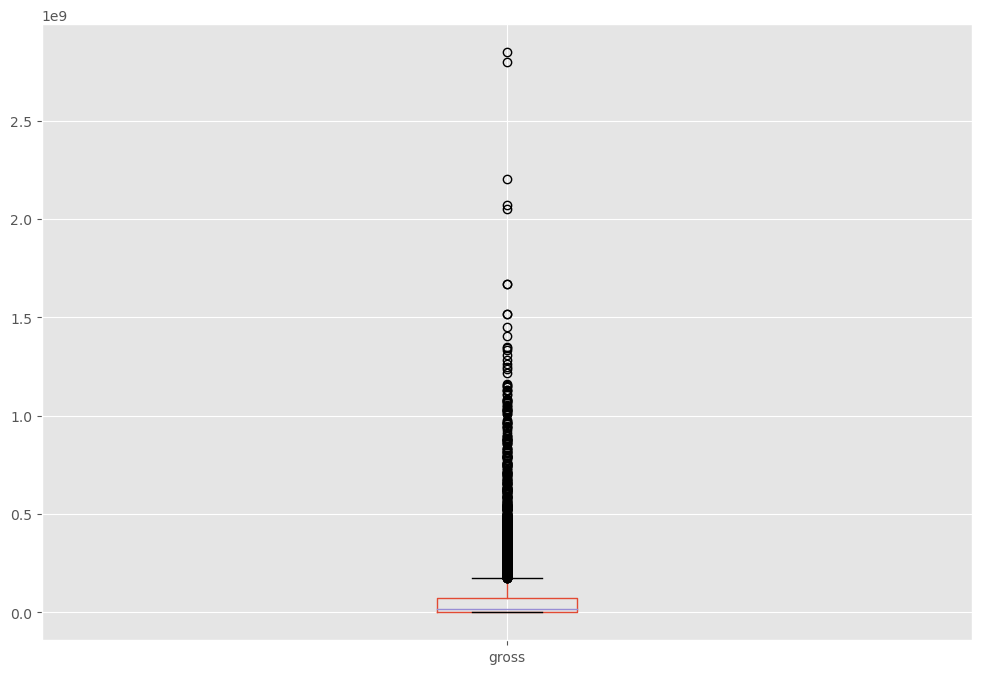

In [29]:
# Check for outliers

df.boxplot(column=['gross'])

Text(0, 0.5, 'Budget of Film')

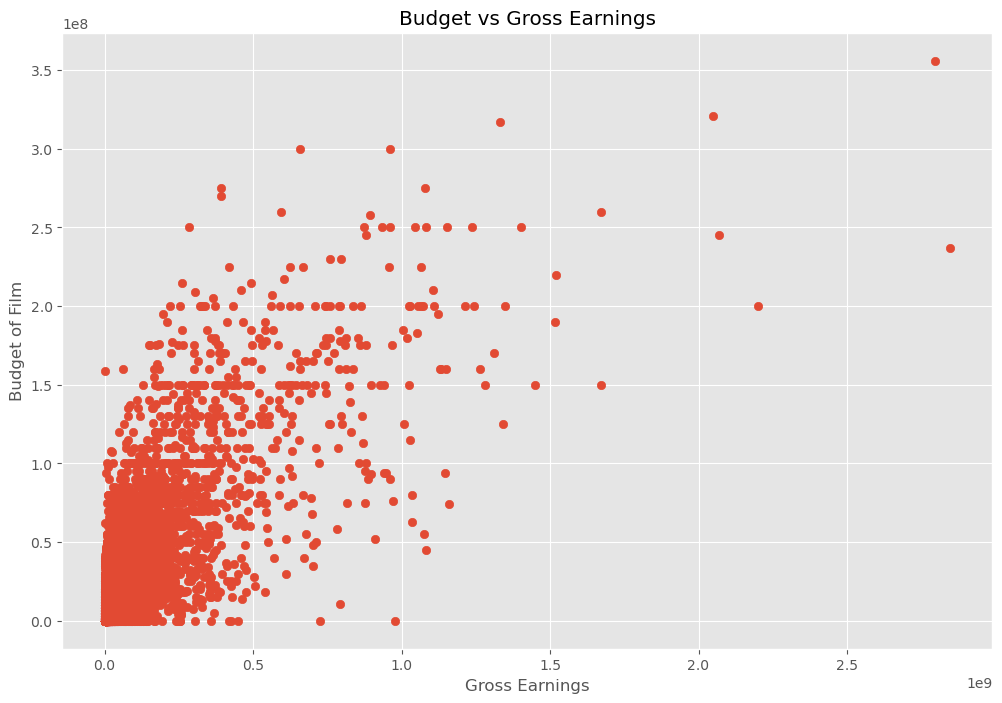

In [37]:
#Plot Budget vs Gross using Scatterplot
plt.scatter(x=df['gross'], y=df['budget'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget of Film')

<Axes: xlabel='budget', ylabel='gross'>

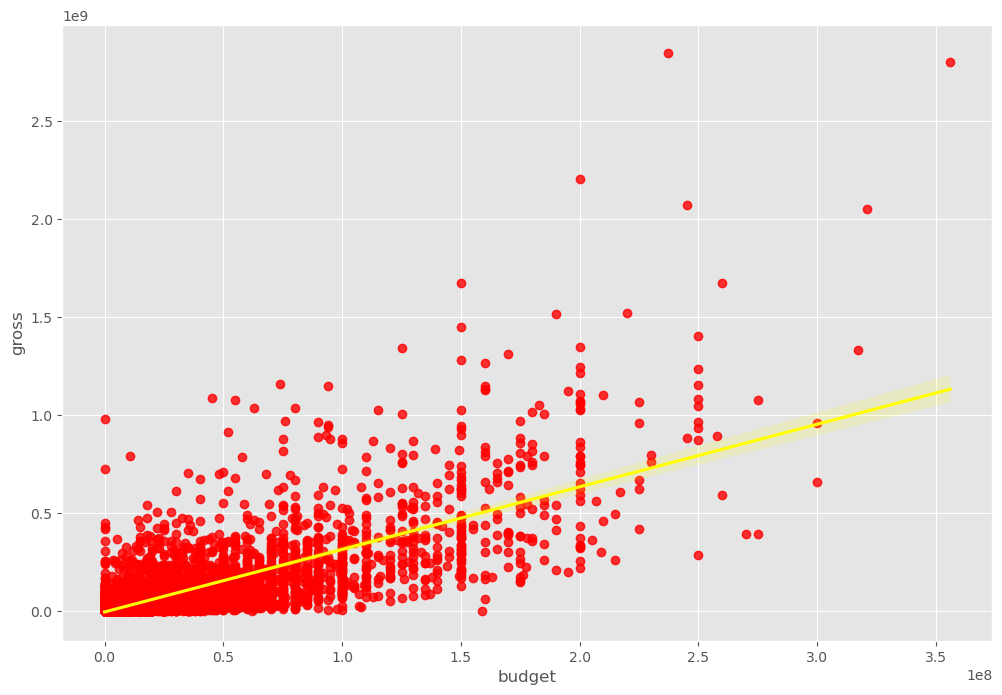

In [45]:
#Let's check to see correlations in Budget and Gross which might influence the production of moives

sns.regplot(x="budget", y="gross", data=df, scatter_kws={'color':'red'}, line_kws={'color':'yellow'})

<Axes: xlabel='score', ylabel='gross'>

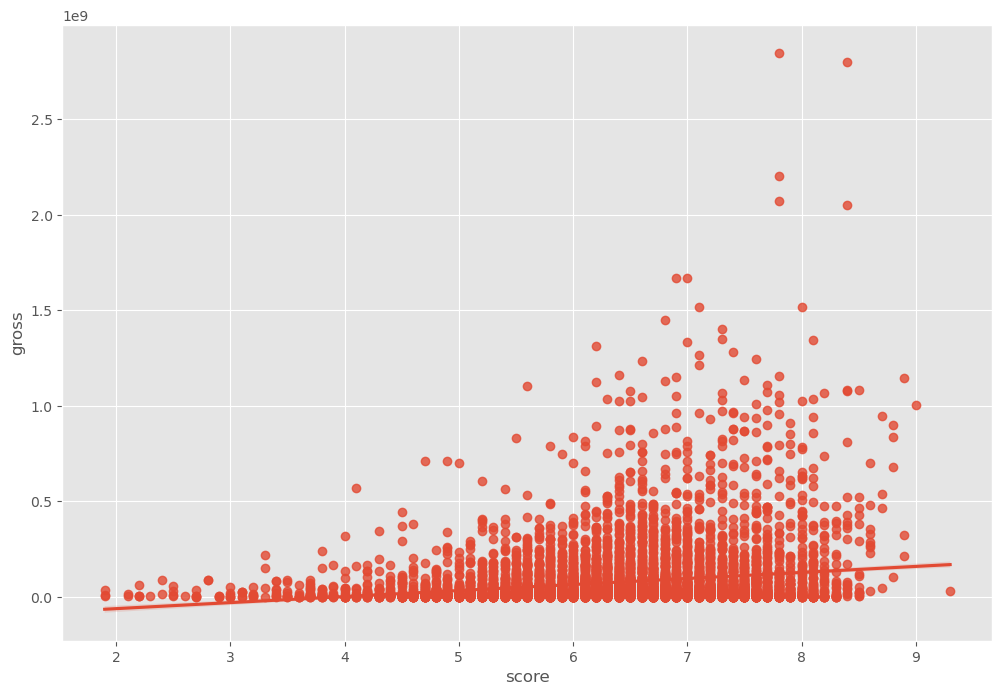

In [31]:
sns.regplot(x="score", y="gross", data=df)

In [44]:
# Correlation Matrix between all numeric columns

df.corr(numeric_only=True)

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

In [46]:
df.corr(method='pearson',numeric_only=True) #Pearson Correlation

year     score     votes    budget     gross   runtime
year     1.000000  0.097995  0.222945  0.309212  0.261900  0.120811
score    0.097995  1.000000  0.409182  0.055665  0.186392  0.399451
votes    0.222945  0.409182  1.000000  0.486862  0.632834  0.309212
budget   0.309212  0.055665  0.486862  1.000000  0.750157  0.269510
gross    0.261900  0.186392  0.632834  0.750157  1.000000  0.245235
runtime  0.120811  0.399451  0.309212  0.269510  0.245235  1.000000

In [47]:
df.corr(method='kendall',numeric_only=True) #Kendall Correlation. Purpose is to check comparison.

year     score     votes    budget     gross   runtime
year     1.000000  0.067652  0.331465  0.209304  0.216595  0.097184
score    0.067652  1.000000  0.300115 -0.005194  0.090626  0.283611
votes    0.331465  0.300115  1.000000  0.439902  0.560118  0.198240
budget   0.209304 -0.005194  0.439902  1.000000  0.541956  0.176016
gross    0.216595  0.090626  0.560118  0.541956  1.000000  0.176912
runtime  0.097184  0.283611  0.198240  0.176016  0.176912  1.000000

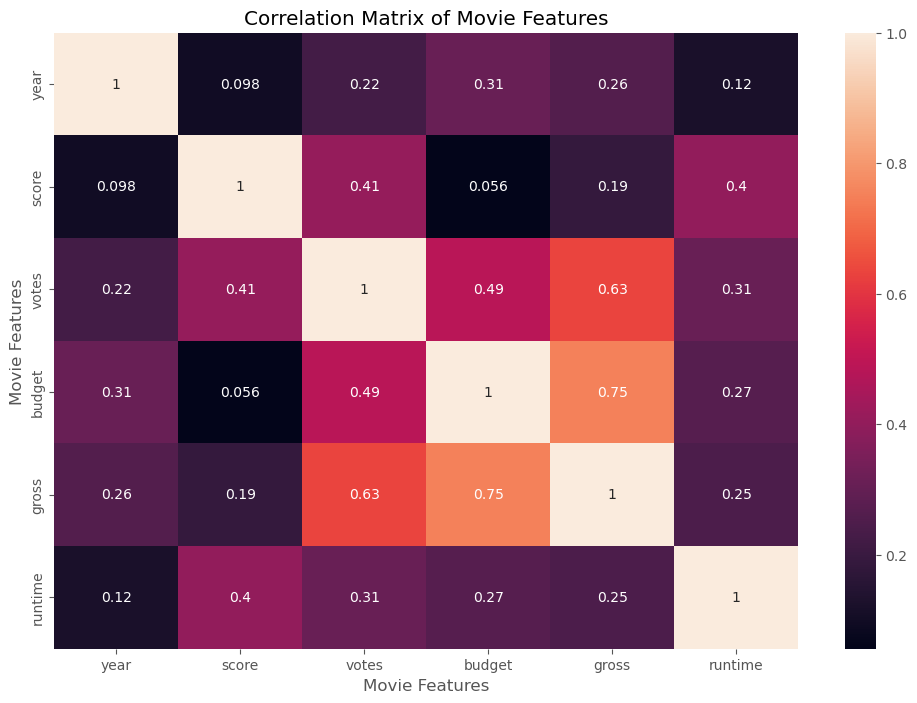

In [50]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=True)

plt.title('Correlation Matrix of Movie Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()


In [51]:
# Using factorize - this assigns a random numeric value for each unique categorical value

df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

name    rating     genre      year  released     score  \
name      1.000000  0.143938  0.036367  0.965761  0.005512 -0.046733   
rating    0.143938  1.000000 -0.086723  0.156713 -0.023210  0.012595   
genre     0.036367 -0.086723  1.000000  0.037184 -0.006096 -0.002437   
year      0.965761  0.156713  0.037184  1.000000  0.002813 -0.044981   
released  0.005512 -0.023210 -0.006096  0.002813  1.000000  0.027790   
score    -0.046733  0.012595 -0.002437 -0.044981  0.027790  1.000000   
votes     0.287776  0.099972  0.023285  0.312401 -0.050240 -0.009749   
director  0.745905  0.085520  0.047288  0.770497  0.007811 -0.022687   
writer    0.805211  0.103623  0.033688  0.824770  0.016584 -0.034685   
star      0.731565  0.093116  0.038649  0.756400  0.019895 -0.009896   
country   0.142828  0.000494 -0.015795  0.140216  0.018554  0.023097   
budget    0.275691  0.193229  0.069445  0.298022 -0.086298 -0.011749   
gross     0.947540  0.158575  0.038635  0.981090 -0.001561 -0.047004   
company   0.591667 -0.028035  0.009566  0.601571  0.058092 -0.028432   
runtime   0.048955  0.032741  0.001462  0.050647 -0.036201  0.026436   

             votes  director    writer      star   country    budget  \
name      0.287776  0.745905  0.805211  0.731565  0.142828  0.275691   
rating    0.099972  0.085520  0.103623  0.093116  0.000494  0.193229   
genre     0.023285  0.047288  0.033688  0.038649 -0.015795  0.069445   
year      0.312401  0.770497  0.824770  0.756400  0.140216  0.298022   
released -0.050240  0.007811  0.016584  0.019895  0.018554 -0.086298   
score    -0.009749 -0.022687 -0.034685 -0.009896  0.023097 -0.011749   
votes     1.000000  0.192220  0.224122  0.179601 -0.045914  0.395374   
director  0.192220  1.000000  0.748340  0.682385  0.155471  0.108033   
writer    0.224122  0.748340  1.000000  0.675685  0.157202  0.186680   
star      0.179601  0.682385  0.675685  1.000000  0.182045  0.110870   
country  -0.045914  0.155471  0.157202  0.182045  1.000000 -0.068884   
budget    0.395374  0.108033  0.186680  0.110870 -0.068884  1.000000   
gross     0.286308  0.751149  0.805784  0.735911  0.134123  0.282633   
company   0.008900  0.552258  0.546151  0.527116  0.226346 -0.087285   
runtime   0.106024 -0.011070  0.032264  0.035392  0.124154  0.115359   

             gross   company   runtime  
name      0.947540  0.591667  0.048955  
rating    0.158575 -0.028035  0.032741  
genre     0.038635  0.009566  0.001462  
year      0.981090  0.601571  0.050647  
released -0.001561  0.058092 -0.036201  
score    -0.047004 -0.028432  0.026436  
votes     0.286308  0.008900  0.106024  
director  0.751149  0.552258 -0.011070  
writer    0.805784  0.546151  0.032264  
star      0.735911  0.527116  0.035392  
country   0.134123  0.226346  0.124154  
budget    0.282633 -0.087285  0.115359  
gross     1.000000  0.588371  0.043017  
company   0.588371  1.000000  0.005137  
runtime   0.043017  0.005137  1.000000

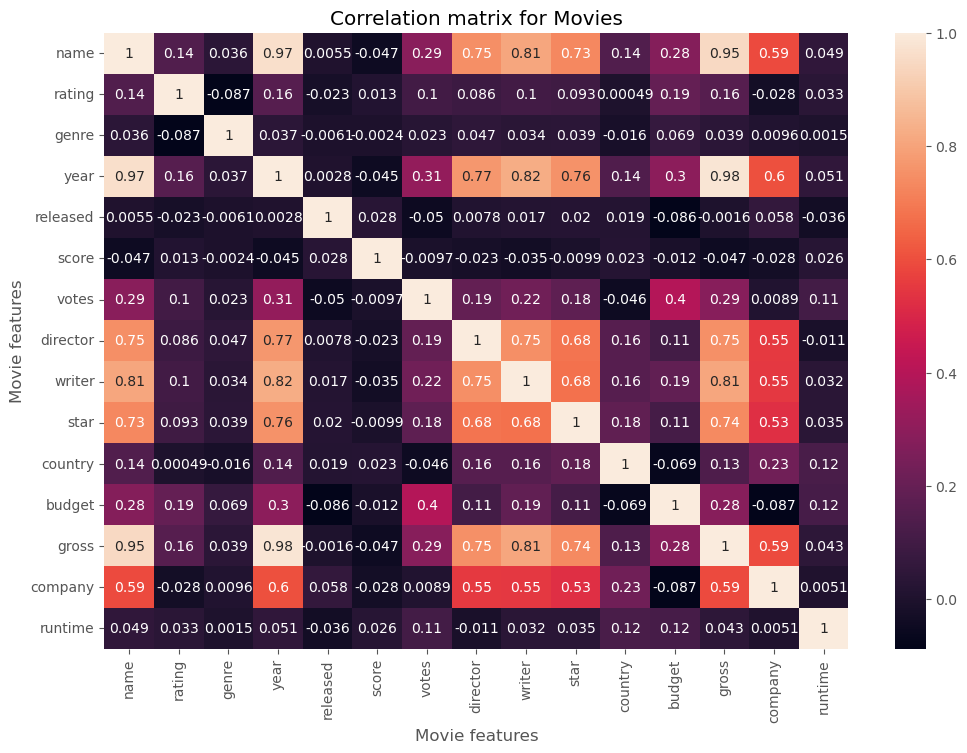

In [52]:
correlation_matrix = df.apply(lambda x: x.factorize()[0]).corr(method='pearson')

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Movies")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()